In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [234]:
df = pd.read_csv('/content/tehranhouses.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [235]:
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3500000000,116666.67
3475,83,2,True,True,True,Niavaran,6800000000,226666.67
3476,75,2,False,False,False,Parand,365000000,12166.67
3477,105,2,True,True,True,Dorous,5600000000,186666.67
3478,82,2,False,True,True,Parand,360000000,12000.00


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 146.2+ KB


In [237]:
df.sample(4)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
644,121,3,True,True,True,Pardis,630000000,21000.00
200,83,2,True,True,True,Republic,1909000000,63633.33
2944,135,2,False,False,False,Seyed Khandan,3800000000,126666.67
3404,63,3,False,True,False,Javadiyeh,1450000000,48333.33


In [238]:
df['Warehouse'] = df['Warehouse'].map({'False':0 , 'True':1})
df['Elevator'] = df['Elevator'].map({'False':0 , 'True':1})
df['Parking'] = df['Parking'].map({'False':0 , 'True':1})


In [239]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,NaN,NaN,NaN,Shahran,1850000000,61666.67
1,60,1,NaN,NaN,NaN,Shahran,1850000000,61666.67
2,79,2,NaN,NaN,NaN,Pardis,550000000,18333.33
3,95,2,NaN,NaN,NaN,Shahrake Qods,902500000,30083.33
4,123,2,NaN,NaN,NaN,Shahrake Gharb,7000000000,233333.33


In [240]:
  A=df['Address']


In [241]:
A.head()

,Address
0,Shahran
1,Shahran
2,Pardis
3,Shahrake Qods
4,Shahrake Gharb


In [242]:
  df.drop('Address' ,axis=1 ,inplace =True)

In [243]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,NaN,NaN,NaN,1850000000,61666.67
1,60,1,NaN,NaN,NaN,1850000000,61666.67
2,79,2,NaN,NaN,NaN,550000000,18333.33
3,95,2,NaN,NaN,NaN,902500000,30083.33
4,123,2,NaN,NaN,NaN,7000000000,233333.33


In [244]:
rev_null=['Area','Room','Parking','Warehouse','Elevator','Price','Price(USD)']
df[rev_null]= df[rev_null].replace({
np.nan:df['Area'].mode(),
np.nan:df['Room'].mode(),
np.nan:df['Parking'].mode(),
np.nan:df['Warehouse'].mode(),
np.nan:df['Elevator'].mode(),
np.nan:df['Price'].mean(),
np.nan:df['Price(USD)'].mean()})



In [245]:
df.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Price,0
Price(USD),0


In [246]:
X = df.drop(columns=['Area','Room','Warehouse','Elevator','Parking']).values
y = df['Price'].values

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [278]:
print(type(X_train))

<class 'numpy.ndarray'>


In [279]:

X_train = pd.DataFrame(X_train)
X_train = X_train.apply(pd.to_numeric,errors='coerce')

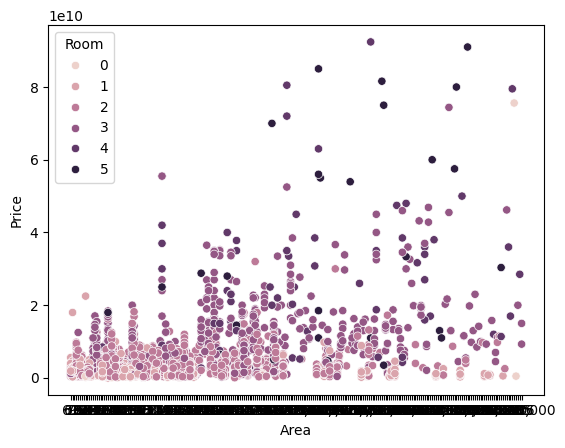

In [271]:
sns.scatterplot(dataset, x= 'Area', y='Price', hue='Room' )
plt.xlabel=['Price']
plt.ylabel=['Area']

In [280]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [281]:
y_pred = classifier.predict(X_test)
y_pred

array([ 1200000000,  1150000000,   550000000,   750000000,  1320000000,
       13000000000,  1200000000,  9000000000,  3900000000,   890000000,
        1050000000,  1250000000, 10500000000,  3450000000,  2600000000,
        4750000000,   950000000,  2750000000, 12000000000,  9300000000,
        1280000000, 70000000000,  3580000000,  2900000000,  1242000000,
        1580000000,  2000000000,   930000000,   600000000,  2750000000,
         890000000,  1470000000,  8300000000,  1440000000,  5200000000,
        1750000000,  2100000000,  2800000000,   650000000,  1550000000,
        4300000000,  3500000000,  2900000000,  2550000000,  1850000000,
        5200000000,  2600000000,  6000000000,  7700000000,  3300000000,
       27000000000,   320000000,  2380000000,  3500000000,  2080000000,
        5600000000,   500000000, 15750000000,  7300000000,  3490000000,
        4150000000, 11000000000,  2350000000,  2160000000, 35000000000,
        2150000000,  1750000000,  3350000000,  5600000000,  1890

In [274]:
from sklearn.metrics import confusion_matrix, classification_report



In [282]:
print(confusion_matrix(y_test,y_pred))


[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [276]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     3600000       0.00      0.00      0.00       0.0
    55000000       0.00      0.00      0.00       1.0
   110000000       0.00      0.00      0.00       1.0
   165000000       0.00      0.00      0.00       1.0
   245000000       0.00      0.00      0.00       1.0
   275000000       0.00      0.00      0.00       1.0
   280000000       0.00      0.00      0.00       1.0
   305000000       0.00      0.00      0.00       1.0
   310000000       0.00      0.00      0.00       1.0
   315000000       0.00      0.00      0.00       1.0
   320000000       0.00      0.00      0.00       2.0
   330000000       0.00      0.00      0.00       1.0
   340000000       0.00      0.00      0.00       1.0
   345000000       0.00      0.00      0.00       1.0
   350000000       0.00      0.00      0.00       2.0
   355000000       0.00      0.00      0.00       1.0
   360000000       0.00      0.00      0.00       1.0
   365000000       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_